# The Classic Birthday Puzzle 

This is my solution to the Riddler Classic from 4th October 2019.

https://fivethirtyeight.com/features/who-wants-to-be-a-riddler-millionaire/

From Joel Lewis, this week’s Riddler Classic is a birthday puzzle for the ages:

The classic birthday problem asks about how many people need to be in a room together before you have better-than-even odds that at least two of them have the same birthday. Ignoring leap years, the answer is, paradoxically, only 23 people — fewer than you might intuitively think.

But Joel noticed something interesting about a well-known group of 100 people: In the U.S. Senate, three senators happen to share the same birthday of October 20: Kamala Harris, Brian Schatz and Sheldon Whitehouse.

And so Joel has thrown a new wrinkle into the classic birthday problem. How many people do you need to have better-than-even odds that at least three of them have the same birthday? (Again, ignore leap years.)

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define function to calculate the point that the odds of X people in the same room having same birthday is > 50%

def birthday_puzzle(matches_needed = 2, people_in_room = 20, sims = 1000):
    
    # create a list range from 1-365, nominally representing each day of the year (excluding leap years)
    birthdays = list(np.arange(1, 365 + 1))

    # initialise a dictionary to store the results
    results = {}
    
    # create a while loop that increments the room size by one for each set of simulations, and breaks when condition met
    while True:
        sim_results = []
        for sim in range(sims):
            room = []
            match = 0
            for x in range(people_in_room):
                room.append(np.random.choice(birthdays))
            highest_match = pd.Series(room).value_counts().max()
            if highest_match >= matches_needed: 
                match = 1
            sim_results.append(match)
        odds = np.mean(sim_results)
        results.update({people_in_room:odds})
        if people_in_room == 200:
            return results
        people_in_room += 1

In [3]:
# run the function for two and three matches, with a starting room size of 2 people, and 1000 simulations
two_match = birthday_puzzle(2, 2, 1000)
three_match = birthday_puzzle(3, 2, 1000)

In [4]:
combined_dict = {'two matches':two_match, 'three matches':three_match}
df = pd.DataFrame.from_dict(combined_dict)
df.reset_index(inplace=True)
df.rename(columns = {'index':'people_in_room'}, inplace=True)
print(df.head())

   people_in_room  two matches  three matches
0               2        0.001            0.0
1               3        0.004            0.0
2               4        0.017            0.0
3               5        0.028            0.0
4               6        0.044            0.0


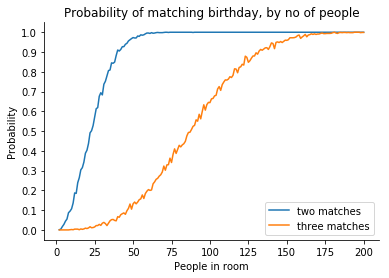

In [5]:
# plot the results of the above simulation
fig, ax = plt.subplots()
ax.plot(df['people_in_room'], df['two matches'])
ax.plot(df['people_in_room'], df['three matches'])

# add plot title, axis labels, legend, and remove right and top spines
plt.title("Probability of matching birthday, by no of people")
plt.xlabel("People in room")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.1, step=0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Hide the right and top spines
plt.show()